**California House Price Prediction.**

The data contains information from the 1990 California census. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [122]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [123]:
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [124]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [125]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff0dea3950>,
      dtype=object)

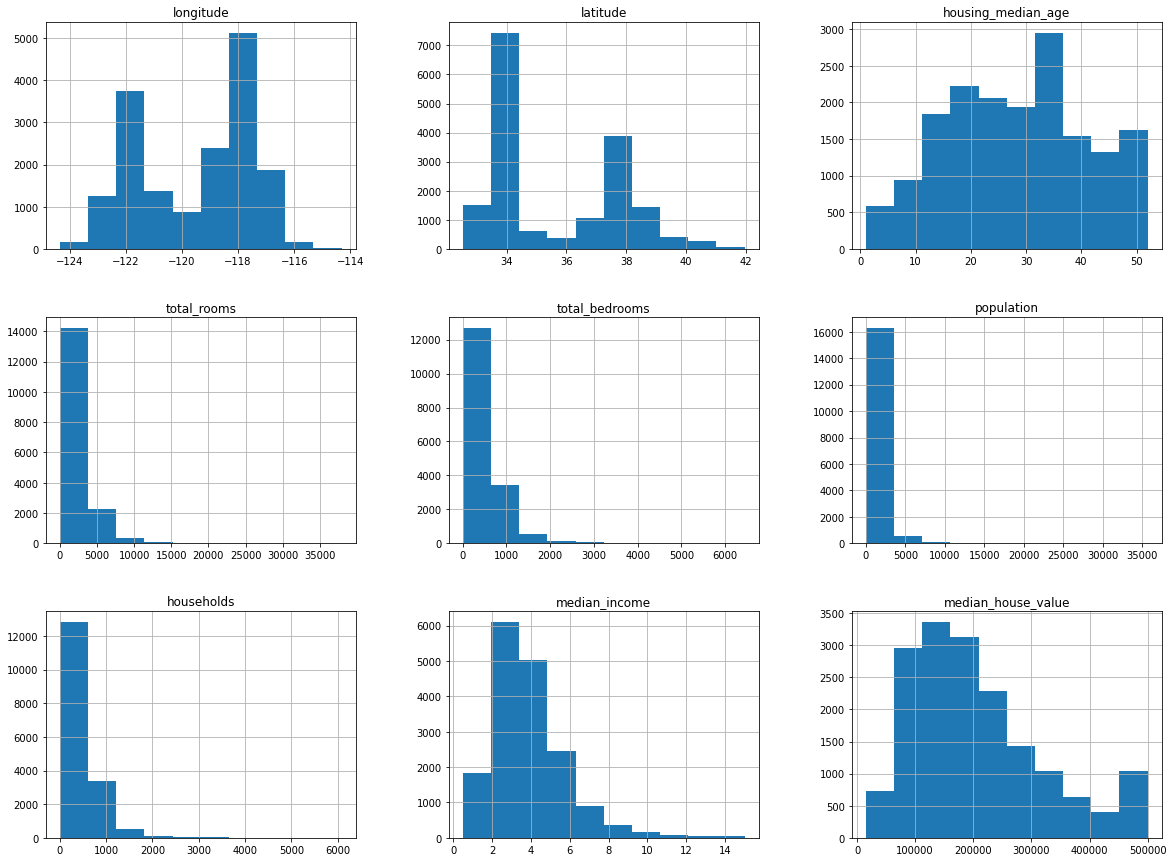

In [126]:
train_data.hist(figsize=(20,15))

In [127]:
corr_df = train_data.corr('spearman')

In [128]:
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879422,-0.155513,0.042930,0.066928,0.127279,0.064688,-0.010154,-0.069728
latitude,-0.879422,1.000000,0.036253,-0.021992,-0.059780,-0.126854,-0.078505,-0.089768,-0.167714
housing_median_age,-0.155513,0.036253,1.000000,-0.356544,-0.307599,-0.285526,-0.281980,-0.143134,0.075706
total_rooms,0.042930,-0.021992,-0.356544,1.000000,0.914076,0.816112,0.906199,0.266565,0.204217
total_bedrooms,0.066928,-0.059780,-0.307599,0.914076,1.000000,0.872507,0.975970,-0.012730,0.082801
population,0.127279,-0.126854,-0.285526,0.816112,0.872507,1.000000,0.904726,-0.002122,-0.000781
households,0.064688,-0.078505,-0.281980,0.906199,0.975970,0.904726,1.000000,0.023498,0.108806
median_income,-0.010154,-0.089768,-0.143134,0.266565,-0.012730,-0.002122,0.023498,1.000000,0.680814
median_house_value,-0.069728,-0.167714,0.075706,0.204217,0.082801,-0.000781,0.108806,0.680814,1.000000


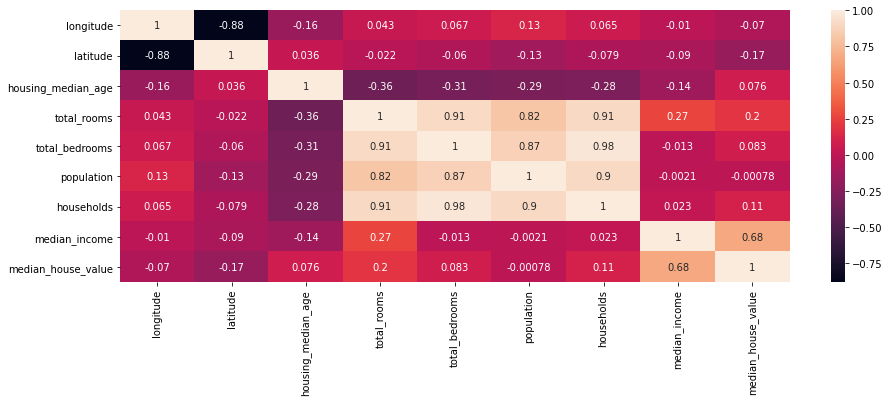

In [129]:
plt.figure(figsize =(15,5))
sns.heatmap(corr_df,annot=True)

In [130]:
droping_features = ['median_house_value']

In [131]:
y = train_data['median_house_value']
#x = train_data.drop(['median_house_value'],axis=1)
x = train_data.drop(droping_features,axis = 1)

In [132]:
x_const = sm.add_constant(x)

In [133]:
x_const

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,1.0,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,1.0,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,1.0,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,1.0,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...,...
16995,1.0,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,1.0,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,1.0,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,1.0,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [134]:
model = sm.OLS(y,x_const).fit()

In [135]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:29:53   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.621e+06   6.92e+04    -52.312      0.000   -3.76e+06   -3.48e+06
longitude          -4.314e+04    789.568    -54.637      0.000   -4.47e+04   -4.16e+04
latitude           -4.293e+04    745.804    -57.556      0.000   -4.44e+04   -4.15e+04
housing_median_age  1150.6949     47.577     24.186      0.000    1057.438    1243.951
total_rooms           -8.3783      0.863     -9.711      0.000     -10.069      -6.687
total_bedrooms       117.6485      7.687     15.305      0.000     102.582     132.715
population           -38.4888      1.186    -32.456      0.000     -40.813     -36.164
households            45.4360      8.445      5.380      0.000      28.883      61.989
median_income       4.051e+04    368.172    110.022      0.000    3.98e+04    4.12e+04
==============================================================================
Omnibus:                     4032.682   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15559.395
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       7.094   Cond. No.                     5.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
model.params

const                -3.620601e+06
longitude            -4.313964e+04
latitude             -4.292567e+04
housing_median_age    1.150695e+03
total_rooms          -8.378251e+00
total_bedrooms        1.176485e+02
population           -3.848877e+01
households            4.543600e+01
median_income         4.050707e+04
dtype: float64

In [137]:
pred_data = test_data.drop(droping_features,axis = 1)

In [138]:
pred_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [139]:
pred_data = sm.add_constant(pred_data)

In [140]:
pred_data.shape

(3000, 9)

In [141]:
model.predict(pred_data)

0       352812.311125
1       212717.700745
2       272344.699519
3       314244.319350
4       119644.222387
            ...      
2995    189380.856561
2996    178045.664529
2997     88220.586437
2998    146374.674815
2999    456779.611078
Length: 3000, dtype: float64

In [142]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [143]:
y_actual = test_data['median_house_value']

In [144]:
y_predicted = model.predict(pred_data)

In [145]:
error = (y_actual - y_predicted)

In [146]:
act_vs_pred = pd.DataFrame({'Actual':y_actual,'Predicted':y_predicted,'Error':error})

In [147]:
act_vs_pred.head()

,Actual,Predicted,Error
0,344700.0,352812.311125,-8112.311125
1,176500.0,212717.700745,-36217.700745
2,270500.0,272344.699519,-1844.699519
3,330000.0,314244.319350,15755.680650
4,81700.0,119644.222387,-37944.222387


In [148]:
rmse = np.sqrt(np.mean(np.square(error)))

In [149]:
print(rmse)

69765.36022216838